<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/Chapter2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2**
## **6. Ensemble**
**앙상블** 방법이란, 머신러닝의 한 방법으로 문제해결을 위한 여러가지 모델들을 조합시켜 모델 훈련을 통해 최고의 성능을 보이는 조합을 찾아내는 것이다. 예를 들어, 분석의 상황에서 회귀 모델과 분류 등의 문제 사이에서 고민을 하게 되는데 이 중 하나를 선택하는 것이 아닌 **여러 모델의 조합을 통해 예측을 수집**한다.
이 과정을 앙상블이라고 한다.

### 1)Bagging

#### a) import dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

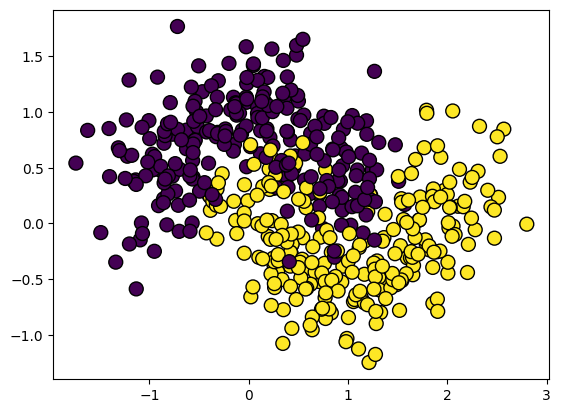

In [3]:
# visualization dataset
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='black')
plt.show()

#### b) data preprocessing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#### c) model fitting

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

mybagging = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42
)

mybagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=42)

In [6]:
y_pred = mybagging.predict(X_test)

#### d) Test model

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


90.4%의 정확도를 보인다.

In [8]:
# Single Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


단일 결정 트리는 85.6%의 정확도로 배깅 앙상블이 더 좋은 성능을 보여줌을 알 수 있다.

In [10]:
# decision boundary를 그리기 위한 code

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

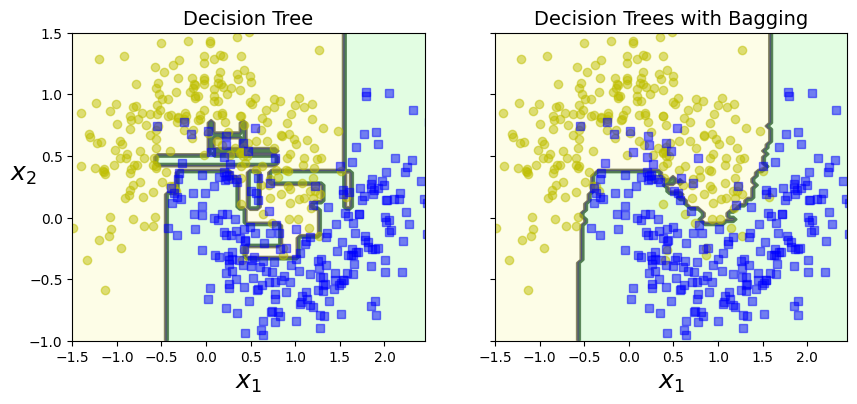

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(mybagging, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

배깅 앙상블의 예측이 단일 결정 트리의 예측보다 결정 경계가 덜 불규칙하며 분류 예측의 정확도가 높다.

### 2) Boosting

boosting은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법이다.

#### a) Gradient Boosting
Gradient Boosting은 이전의 모델이 만든 잔여 오차에 새로운 모델을 학습시키는 방법이다.
이 과정을 통해 오류를 줄여나갈 수 있다.

##### a-1) import dataset

In [12]:
# import package
import numpy as np

# 2차 곡선 형태의 data 생성
np.random.seed(22)
X = 2*np.random.randn(100,1)
y = 2*X**2 + X*4 + np.random.randn(100,1)

##### a-2) model fitting

In [13]:
from sklearn.tree import DecisionTreeRegressor
mytree = DecisionTreeRegressor(max_depth=2)
mytree.fit(X,y)

DecisionTreeRegressor(max_depth=2)

첫번째 모델에서 생긴 **잔여 오차에 두번째 DecisionTreeRegressor를 훈련**시킨다.

In [14]:
y2 = y - mytree.predict(X)[:,None] # 2차원의 array 형태로 만듦
mytree2 = DecisionTreeRegressor(max_depth=2)
mytree2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

두번째 모델이 만든 잔여 오차에 세번째 DecisionTreeRegressor를 훈련시킨다.

In [15]:
y3 = y2 - mytree2.predict(X)[:,None]
mytree3 = DecisionTreeRegressor(max_depth=2)
mytree3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

이제 세 개의 트리를 포함하는 앙상블 모델이 생겼다. 새로운 샘플에 대한 예측을 만들기 위해 모든 트리의 예측값을 더한다.

In [16]:
X_new = np.linspace(-8,8,1000).reshape(-1,1)
y_pred = sum(tree.predict(X_new) for tree in (mytree, mytree2, mytree3))

##### a-3) Test model
새 트리의 예측과 앙상블의 예측을 시각화하여 비교해보자.

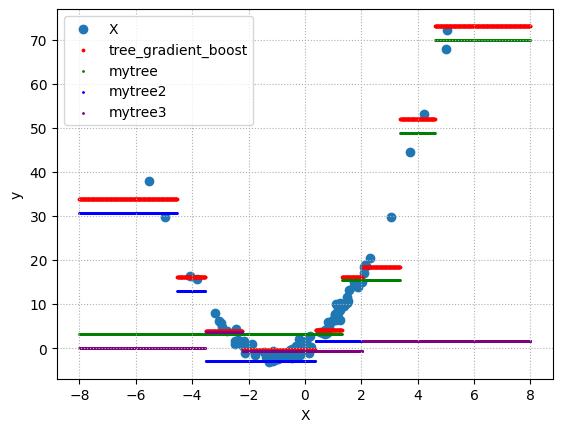

In [17]:

plt.scatter(X, y)
plt.scatter(X_new, y_pred, c = 'red', s=3)
plt.scatter(X_new, mytree.predict(X_new), c='green', s=1)
plt.scatter(X_new, mytree2.predict(X_new), c='blue', s=1)
plt.scatter(X_new, mytree3.predict(X_new), c='purple', s=1)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(linestyle = "dotted")
plt.legend(['X', 'tree_gradient_boost', 'mytree', 'mytree2', 'mytree3'], loc = 'upper left')
plt.show()

앙상블 모델의 예측값이 트리를 이용한 예측값보다 좋아지고 있다는 것을 알 수 있다. 훈련횟수를 더 추가하여 성능이 좋아지는지 확인해보자.

In [18]:
# import package
import numpy as np

# data
X = 2*np.random.randn(100,1)
y = 2*X**2 + X*4 + 10 + np.random.randn(100,1)

treelist = []

# initial value
mytree = DecisionTreeRegressor(max_depth=2)
treelist.append(mytree)
mytree.fit(X,y)

# Gradient Boosting을 10번 실행하는 반복문
for i in range(0,10):
  # 잔여 오차 계산
  y2 = y - mytree.predict(X)[:,None]
  mytree = DecisionTreeRegressor(max_depth=2)
  treelist.append(mytree)
  mytree.fit(X,y2)

  # 다음 iteration을 위해 y update
  y = y2

In [19]:
# 반복문에 의해 y가 달라졌으며 처음의 y를 다시 지정
y = 2*X**2 + X*4 + 10 + np.random.randn(100,1)

X_new = np.linspace(-8,8,1000).reshape(-1,1)
y_pred = sum(tree.predict(X_new) for tree in treelist)

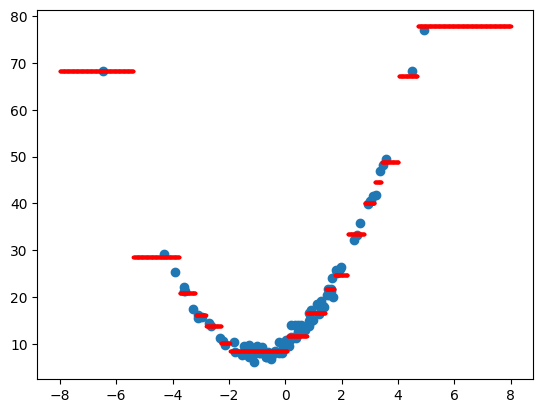

In [20]:
# visualization
plt.scatter(X,y) # 실제값
plt.scatter(X_new, y_pred, c='red', s=3) # 예측값

10회 반복 후 예측력이 더욱 좋아졌다.

다음은 sklearn에서 제공하는 Gradient Boosting package를 이용한 코드이다.

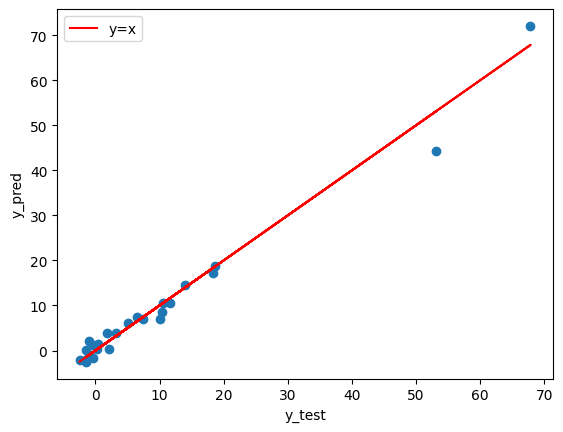

In [21]:
import warnings
warnings.filterwarnings(action = "ignore")

# 2차 곡선 형태의 data 생성
np.random.seed(22)
X = 2*np.random.randn(100,1)
y = 2*X**2 + X*4 + np.random.randn(100,1)

# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# model fitting
from sklearn.ensemble import GradientBoostingRegressor

mygbt = GradientBoostingRegressor(learning_rate=0.1, random_state=0)
mygbt.fit(X_train, y_train)
y_pred = mygbt.predict(X_test)

# test model
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label="y=x", color="r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

#### b) XGBoost
XGBoost는 부스팅에 관련된 여러 알고리즘 중 현재 가장 인기가 많다.
매우 빠른 속도와 정확도 등으로 머신러닝 경연 대회에서 자주 사용되는 도구 중의 하나이다.

##### b-1) import dataset

In [23]:
# import package
import pandas as pd
import numpy as np
import xgboost
import warnings
warnings.filterwarnings("ignore")

In [24]:
# data (n=1000)
np.random.seed(22)
X = 2*np.random.randn(1000,1)
Y = 2*X**2 + X*4 + 10 + np.random.randn(1000,1)

##### b-2) data preprocessing

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0)

##### b-3) model fitting

In [26]:
myxgb = xgboost.XGBRegressor(random_state=0)
myxgb.fit(X_train, y_train)
y_pred = myxgb.predict(X_test)

##### b-4) Test model

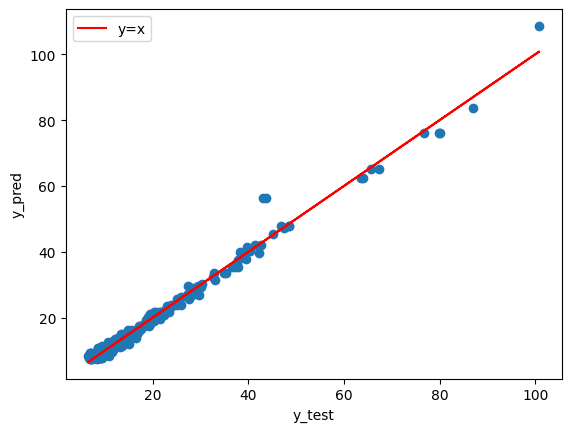

In [27]:
# visualization1
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label="y=x", color="r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

예측값이 실제값을 잘 추정하고 있음을 알 수 있다.

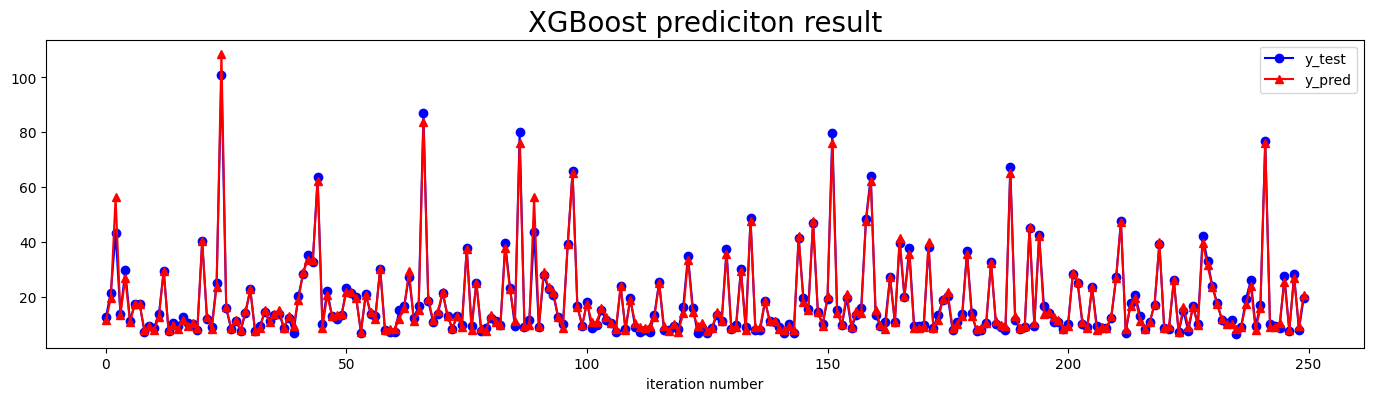

In [28]:
# visualization 2
plt.figure(figsize=(17,4))
plt.plot(y_test, marker="o", color="b", label="y_test")
plt.plot(y_pred, marker="^", color="r", label="y_pred")
plt.title("XGBoost prediciton result", size=20)
plt.xlabel("iteration number")
plt.legend()
plt.show()

#### **cf. hyperparameter**
learning rate는 XGBoost의 hyper parameter 중 하나이다. 즉, learning rate를 변화시키며 최적의 모델을 찾기 위한 과정이 필요하다. 일반적으로 learning rate의 값은 0.1, 0.05, 0.01, 0.001을 이용한다.

In [29]:
def plot_predictions(regressors, X, y, axes, label=None,
                     style='r-', data_style = "b.", data_label=None):
  x1 = np.linspace(axes[0], axes[1], 500)
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
  plt.plot(X[:, 0], y, data_style, label=data_label)
  plt.plot(x1, y_pred, style, linewidth=2, label=label)
  if label or data_label:
    plt.legend(loc="upper center", fontsize=16)
  plt.axis(axes)

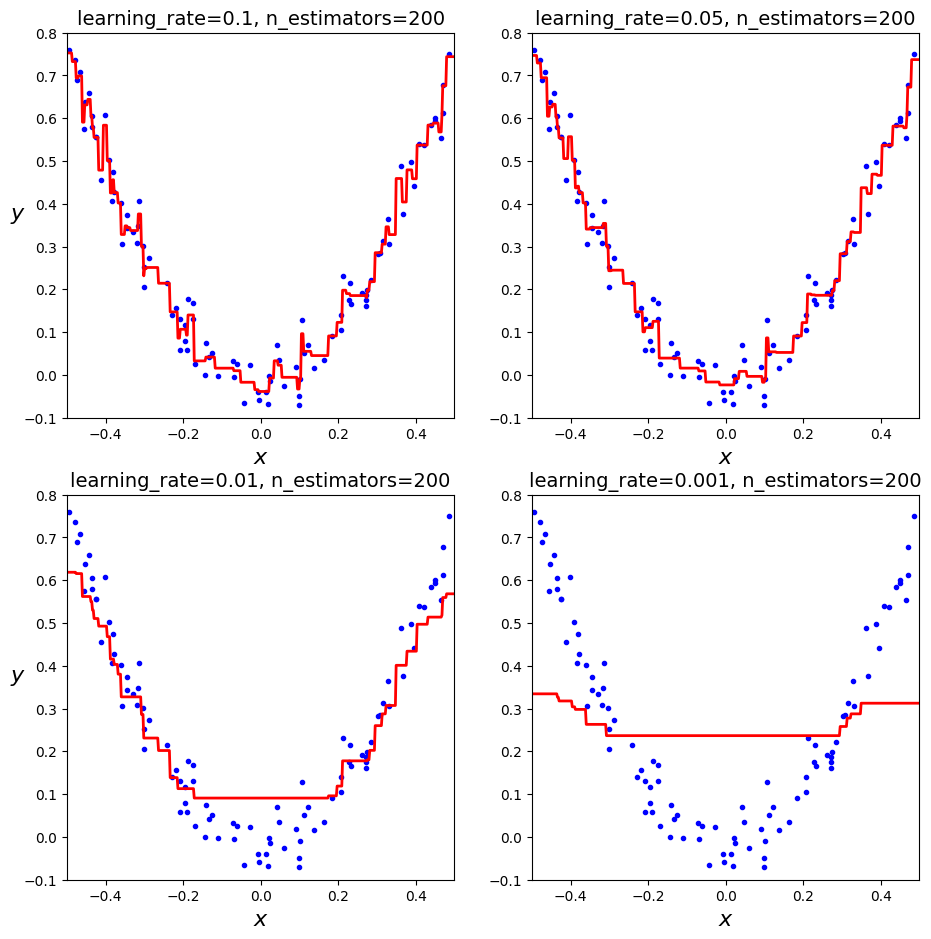

In [30]:
# X, y 생성
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.ensemble import GradientBoostingRegressor

# learning rate = 0.1
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1,
random_state=42)
gbrt1.fit(X, y)

# learning rate = 0.05
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.05,
random_state=42)
gbrt2.fit(X, y)

# learning rate = 0.01
gbrt3 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.01,
random_state=42)
gbrt3.fit(X, y)

# learning rate = 0.001
gbrt4 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.001,
random_state=42)
gbrt4.fit(X, y)

# visualization
plt.figure(figsize=(11,11))

plt.subplot(221)
plot_predictions([gbrt1], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt1.learning_rate, gbrt1.n_estimators),
fontsize=14)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(222)
plot_predictions([gbrt2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt2.learning_rate, gbrt2.n_estimators),
fontsize=14)
plt.xlabel("$x$", fontsize=16)

plt.subplot(223)
plot_predictions([gbrt3], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt3.learning_rate, gbrt3.n_estimators),
fontsize=14)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(224)
plot_predictions([gbrt4], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt4.learning_rate, gbrt4.n_estimators),
fontsize=14)
plt.xlabel("$x$", fontsize=16)

plt.show()

#### **cf. Gradient Boosting VS XGBoost**

In [31]:
# RMSE
from sklearn.metrics import mean_squared_error

In [34]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)
%timeit GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
# %timeit은 jupyter에서 코드 실행 시간을 측정하는 커맨드

print("validation error", mean_squared_error(y_test,y_pred_gbt))

2.51 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
validation error 1.1802893464703095


In [35]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=2, n_estimaotrs=120, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
%timeit XGBRegressor(max_depth=2, n_estimaotrs=120, random_state=42)

print("validation error", mean_squared_error(y_test, y_pred_xgb))

9.72 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
validation error 2.7361592329224957


계산 속도와 예측의 정확성 면에서 둘 다 Gradient Boosting이 더 좋은 성능을 보인다.

### 3) random forest
**Bagging**처럼 Bootstrap 방식을 이용해 데이터를 복원 추출하고, **변수를 random하게 추출하여** 다양한 모델을 나오도록 하여 **모델 간 공분산을 줄인다**.

#### a) import dataset

In [36]:
# import package
import pandas as pd

# import dataset
mydata = pd.read_csv('otto_data.csv')

In [37]:
mydata.head(3)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1


#### b) data preprocessing

In [39]:
# 불필요한 변수 제거
mydata = mydata.drop(['id'], axis=1)

target을 수치형 변수로 변환하기 위해 label-encoding 시행

In [40]:
# label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(mydata['target'])     # encoder를 학습
mydata['target'] = encoder.transform(mydata['target'])      # encoding을 df에 적용

In [41]:
print("라벨링 결과")
for i, label in enumerate(encoder.classes_):
  print(label, '->', i)

라벨링 결과
Class_1 -> 0
Class_2 -> 1
Class_3 -> 2
Class_4 -> 3
Class_5 -> 4
Class_6 -> 5
Class_7 -> 6
Class_8 -> 7
Class_9 -> 8


In [42]:
# feature/target 분리
X = mydata.drop(['target'], axis=1)
y = mydata['target']

In [43]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


#### c) model fitting

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

myrf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

#### d) Test model

In [45]:
y_pred = myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6033451842275371


정확도를 늘리기 위해 n_estimators(sample)의 수를 늘려보자.

In [46]:
# sample = 200
myrf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred = myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6000323206205559


In [47]:
# sample = 400
myrf = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred = myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6022947640594699


In [48]:
# sample = 500
myrf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred = myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6000323206205559


sample의 수에 비례해서 정확도가 좋아지진 않는다.

일반적으로 RF에서 max_depth = 5로 지정한다.

#### **cf. GridSearchCV**

Boosting 모델에서는 다양한 hyperparameter가 존재한다. Hyperparameter는 모델을 세부적으로 tuning하여 최적의 성능을 찾는 것이며, boosting 모델에 경우 hyperparameter에 따라 성능의 변화의 폭이 크다. 따라서, **가장 좋은 성능을 내는 hyperparameter의 조합을 찾기 위해 Grid Search를 사용**한다.

**설정하고자 하는 parameter와 그 값을 지정**하면 가능한 모들 hyperparameter 조합에 대해 cross validation을 사용해 평가하게 된다.

다음 코드는 RandomForestRegressor에 대한 최적의 hyperparameter 조합을 탐색한다.

In [51]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

load_boston()

In [52]:
import pandas as pd
import numpy as np
from urllib.request import urlopen

# URL에서 텍스트 불러오기
url = "https://lib.stat.cmu.edu/datasets/boston"
raw_data = urlopen(url).read().decode("utf-8").splitlines()

# 데이터 줄만 따로 뽑기 (first 22 lines = 설명, 이후부터 실제 데이터)
data_lines = raw_data[22:]

# 2줄씩 묶어서 13개 컬럼 구성 (각 관측치가 2줄로 되어 있음)
data = []
for i in range(0, len(data_lines), 2):
    line1 = list(map(float, data_lines[i].strip().split()))
    line2 = list(map(float, data_lines[i+1].strip().split()))
    data.append(line1 + line2)

# DataFrame으로 변환
boston = pd.DataFrame(data)

# 컬럼 이름 지정 (보통 sklearn에 들어 있는 컬럼명을 따름)
boston.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
# feature/target
X = boston.drop(['MEDV'], axis=1)
Y = boston['MEDV']

In [54]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [56]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [100,200,300], 'max_features':[2,3,4,5]},
    {'bootstrap': [False], 'n_estimators': [100,200,300], 'max_features': [4,5,6,7,8]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [100, 200, 300]},
                         {'bootstrap': [False], 'max_features': [4, 5, 6, 7, 8],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

grid search는 scoring에 지정된 함수의 값이 클수록 좋은 함수로 인식한다. 다만 mse의 값의 경우 값이 작을 수록 좋은 모델이기에 neg_mean_squared_error를 사용해야 한다.

첫번째 dict에 있는 n_estimators와 max_features의 조합인 12개(3X4)를 평가한 다음, 두번째 dict에 있는 조합인 15개(3X5)를 시도한다. 이처럼 다른 조합을 시도해보고 싶다면 dict를 추가해주면 된다.

따라서, 해당 모델에서는 총 27개의 모델을 훈련하고 각각 다섯번씩 모델을 훈련해 135번(27X5) 훈련하게 된다.

In [58]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 200}

해당 예시에서는 max_feature가 4, n_estimators가 200일 때 최적의 모델을 훈련한다.

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=200)

각 모델에 대한 테스트 결과도 확인할 수 있다.

In [61]:
cvres = grid_search.cv_results_

import numpy as np
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

3.8432848155043646 {'max_features': 2, 'n_estimators': 100}
3.8025904298698747 {'max_features': 2, 'n_estimators': 200}
3.775052484705415 {'max_features': 2, 'n_estimators': 300}
3.6652198003161587 {'max_features': 3, 'n_estimators': 100}
3.680059130855032 {'max_features': 3, 'n_estimators': 200}
3.7055211171202185 {'max_features': 3, 'n_estimators': 300}
3.648480808179524 {'max_features': 4, 'n_estimators': 100}
3.6011639713950054 {'max_features': 4, 'n_estimators': 200}
3.641801949183229 {'max_features': 4, 'n_estimators': 300}
3.6600525647999596 {'max_features': 5, 'n_estimators': 100}
3.6627821741382838 {'max_features': 5, 'n_estimators': 200}
3.61259690642423 {'max_features': 5, 'n_estimators': 300}
3.5880564416745133 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
3.501817893053707 {'bootstrap': False, 'max_features': 4, 'n_estimators': 200}
3.55930079087131 {'bootstrap': False, 'max_features': 4, 'n_estimators': 300}
3.6850147448027353 {'bootstrap': False, 'max_feat

여러 boosting 모델을 정의해 각 모델 별 grid search를 진행해보자.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

def clf3():
  rf = RandomForestRegressor()
  gb = GradientBoostingRegressor()
  xgb = XGBRegressor()

  return rf, gb, xgb

In [63]:
rf, gb, xgb = clf3()

In [64]:
rf_parameters = {'max_depth': [3,4,5,6,7,8], 'n_estimators':[100,200,300],
                 'random_state':[99]}
gb_parameters = {'max_depth': [4,5,7], 'n_estimators':[100,200,300],
                 'learning_rate':[0.01, 0.1], 'random_state':[99]}
xgb_parameters = {'max_depth':[3,4,5,6], 'n_estimators':[100,200,300],
                  'learning_rate':[0.01,0.1], 'gamma':[0.5,1,2], 'random_state':[99]}

##### RandomForest

In [70]:
grid_search_rf = GridSearchCV(rf, rf_parameters,
                              scoring='recall', cv=10)
grid_search_rf.fit(X_train,y_train)

# best hyperparamter 값을 받음
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=3, random_state=99)

In [71]:
print(round(best_rf.score(X_test, y_test),3))

0.823


In [72]:
from sklearn.metrics import r2_score
y_pred_rf = best_rf.predict(X_test)
r2_score(y_test, y_pred_rf)

0.8226199055000577

##### Gradient Boosting

In [69]:
grid_search_gb = GridSearchCV(gb, gb_parameters,
                              scoring='recall', cv=10)
grid_search_gb.fit(X_train, y_train)

# best hyperparamter
best_gb = grid_search_gb.best_estimator_
best_gb

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=99)

In [74]:
print(round(best_gb.score(X_test,y_test),3))

0.742


In [76]:
y_pred_gb = best_gb.predict(X_test)
print(r2_score(y_test, y_pred_gb))

0.741673778796374


##### XGBoost

In [77]:
grid_search_xgb = GridSearchCV(xgb, xgb_parameters,
                               scoring='recall', cv=10)
grid_search_xgb.fit(X_train, y_train)

# best hyperparamter
best_xgb = grid_search_xgb.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=99, ...)

In [78]:
print(round(best_xgb.score(X_test,y_test),3))

0.69


In [80]:
y_pred_xgb = best_xgb.predict(X_test)
print(r2_score(y_test, y_pred_xgb))

0.6902140945024993


## **7. Study Case for classification**
Bank Marketing Dataset을 이용해 'deposit'을 이용할 것인지 아닌지를 예측하는 모델을 만들고, 각 모델별로 예측력을 비교해보자.

In [81]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [84]:
# duration 제거
bank = bank.drop(['duration'], axis=1)

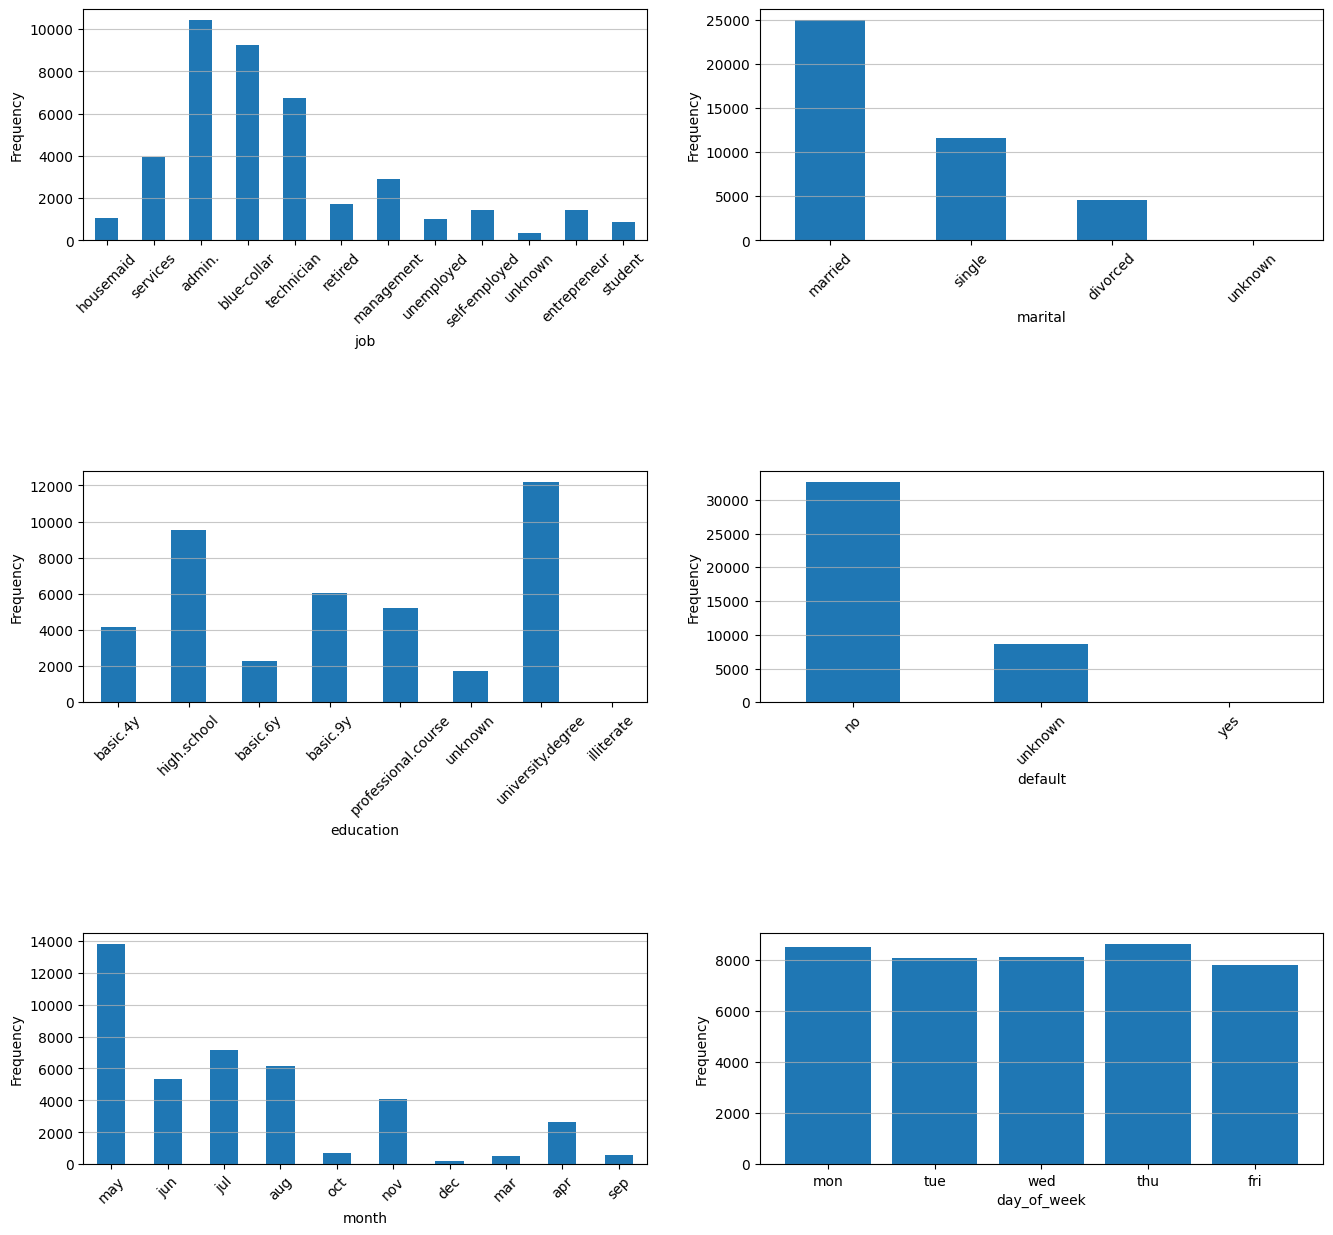

In [87]:
# 범주형 변수에 대해 histogram 그리기
# Histogram
plt.figure(figsize=(16,15))
plt.subplots_adjust(hspace=1)

# job
plt.subplot(321)
bank['job'].value_counts(sort=False).plot.bar(rot=45)
plt.xlabel('job')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

# marital
plt.subplot(322)
bank['marital'].value_counts(sort=False).plot.bar(rot=45)
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

# education
plt.subplot(323)
bank['education'].value_counts(sort=False).plot.bar(rot=45)
plt.xlabel('education')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

# default
plt.subplot(324)
bank['default'].value_counts(sort=False).plot.bar(rot=45)
plt.xlabel('default')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

# month
plt.subplot(325)
bank['month'].value_counts(sort=False).plot.bar(rot=45)
plt.xlabel('month')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

# day_of_week
plt.subplot(326)
weekday_order = ['mon','tue','wed','thu','fri']
df_weekday = bank['day_of_week'].value_counts()
df_weekday = df_weekday.loc[weekday_order]
plt.bar(df_weekday.index, df_weekday.values)
plt.xlabel('day_of_week')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)



target에 대한 그래프 그리기

In [89]:
bank['y'].value_counts()

,count
y,
no,36548
yes,4640


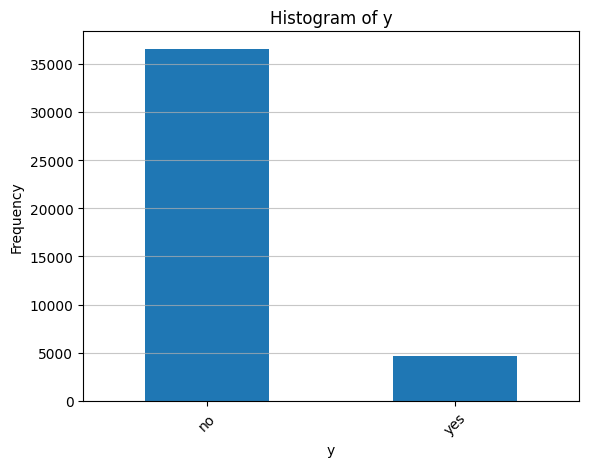

In [90]:
bank['y'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

no의 빈도수가 'yes'에 비해 많다

#### b) data preprocessing

In [91]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


결측치 존재하지 않음.

In [98]:
# feature / target
X = bank.drop(['y'], axis=1)
y = bank['y']

In [99]:
# One-Hot encoding
X = pd.get_dummies(X, columns = ['job', 'marital', 'education','default',
                                 'housing', 'loan', 'contact', 'month',
                                 'day_of_week', 'poutcome'],
                   prefix = ['job', 'marital', 'education','default',
                             'housing', 'loan', 'contact', 'month',
                             'day_of_week', 'poutcome'], dtype=int)

In [100]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  int64  
 10  job_blue-collar                41188 non-null  int64  
 11  job_entrepreneur               41188 non-null  int64  
 12  job_housemaid                  41188 non-null 

In [102]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    test_size=0.2, random_state=1)

#### c) model fitting

##### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

mytree = DecisionTreeClassifier(criterion = 'gini')
mytree.fit(X_train, y_train)

DecisionTreeClassifier()

##### Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

mygbt = GradientBoostingClassifier(learning_rate = 0.1)
mygbt.fit(X_train, y_train)

GradientBoostingClassifier()

##### XGBoost

In [105]:
from xgboost import XGBClassifier
myxgb = XGBClassifier(use_label_encoder = False)
myxgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Bagging

In [106]:
from sklearn.ensemble import BaggingClassifier

mybag = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators = 500,
                          max_samples = 100, bootstrap=True,
                          random_state=1)
mybag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=1)

##### RandomForest

In [107]:
from sklearn.ensemble import RandomForestClassifier
myrf = RandomForestClassifier(n_estimators=500,
                              max_depth=5, random_state=1)
myrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=1)

#### d) Test model

In [108]:
def evaluate_model(model, x_test, y_test):
  from sklearn import metrics
  import pandas as pd

  # predict test data
  y_pred = model.predict(X_test)

  # calculate accuracy
  acc = metrics.accuracy_score(y_test, y_pred)

  # display Confusion matrix
  mtx = metrics.confusion_matrix(y_test, y_pred)
  label = ['no', 'yes']
  table = pd.DataFrame(mtx, columns = label, index=label)

  return table, acc

def return_fun(mymodel, X_test, y_test):
  print('===============================')
  print(f'{mymodel} 결과')
  print('===============================')
  print(f'confusion matrix')
  print(f'{evaluate_model(mymodel, X_test, y_test)[0]}')
  print(f'accuracy')
  print(f'{evaluate_model(mymodel, X_test, y_test)[1]}')
  print('\n')

In [111]:
# Decision Tree
return_fun(mytree, X_test, y_test)

# Gradient Boosting
return_fun(mygbt, X_test, y_test)

# XGBoost
return_fun(myxgb, X_test, y_test)

# Bagging
return_fun(mybag, X_test, y_test)

# Random Forest
return_fun(myrf, X_test, y_test)

DecisionTreeClassifier() 결과
confusion matrix
       no  yes
no   6589  705
yes   630  314
accuracy
0.837946103423161


GradientBoostingClassifier() 결과
confusion matrix
       no  yes
no   7178  116
yes   704  240
accuracy
0.9004612770089827


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

accuracy를 시각화

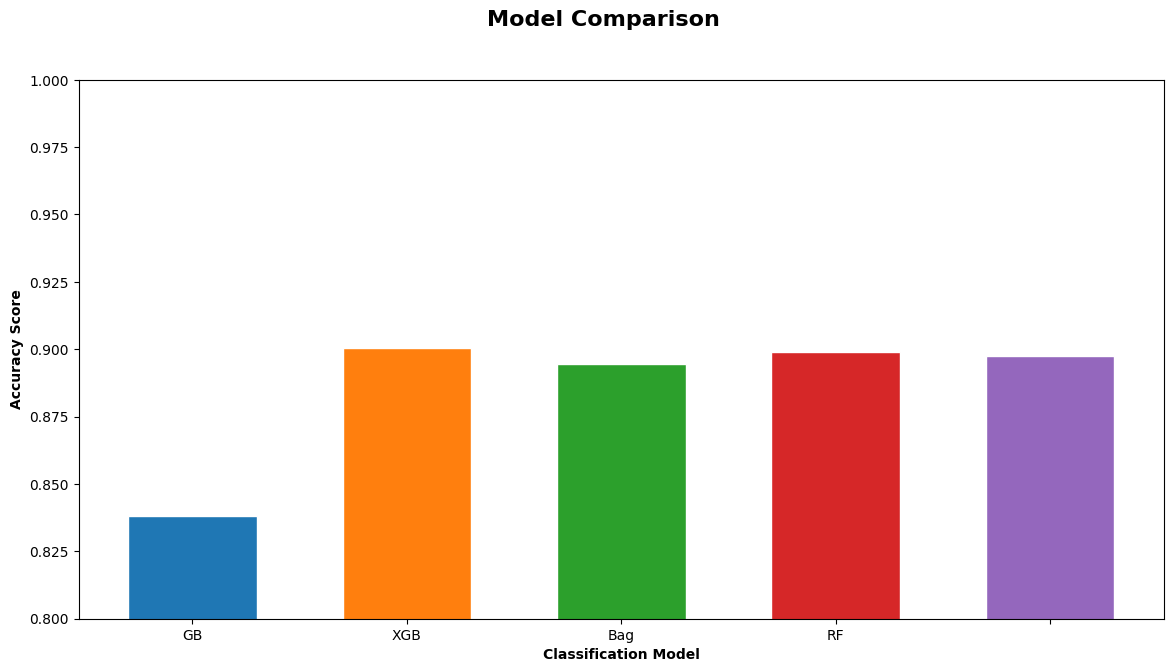

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Intitialize figure
fig, ax1 = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## set bar size
barWidth = 0.6

## Make the plot
ax1.bar(0, evaluate_model(mytree, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(1, evaluate_model(mygbt, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(2, evaluate_model(myxgb, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(3, evaluate_model(mybag, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(4, evaluate_model(myrf, X_test, y_test)[1], width=barWidth, edgecolor='white')

## Configure x and y axis
ax1.set_xlabel('Classification Model', fontweight='bold')
labels = ['DT', 'GB', 'XGB', 'Bag', 'RF']
ax1.set_xticklabels(labels)
ax1.set_ylabel('Accuracy Score', fontweight='bold')
ax1.set_ylim(0.8, 1.0)
plt.show()

Gradient Boosting의 accuracy가 가장 좋다.